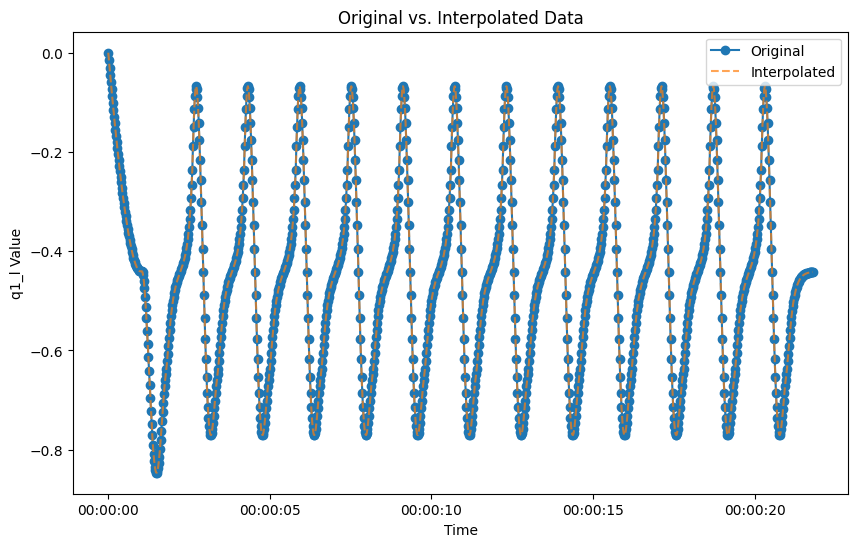

Interpolated data saved to position_refs/interpolated_walkingPattern_ref_fast.csv


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

file_path = 'Xing_trajectories/walkingPattern_ref_fast.csv'
# file_path = 'Xing_trajectories/walkingPattern_ref_slow.csv'

output_file_path = 'Xing_trajectories/interpolated_walkingPattern_ref_fast.csv'
# output_file_path = 'Xing_trajectories/interpolated_walkingPattern_ref_slow.csv'

# Read the CSV file, excluding unwanted columns but keeping the original column names
df = pd.read_csv(file_path, usecols=['time', 'q1_l', 'q1_r', 'q2_l', 'q2_r'])
original_columns = df.columns.tolist()  # Store original columns for later use

# Convert 'time' to a datetime index to facilitate resampling
# Since 'time' is a float representing seconds, we convert it to a timedelta
# and then create a datetime index starting from a reference point
df['time'] = pd.to_timedelta(df['time'], unit='s')
df.set_index(pd.to_datetime('2000-01-01') + df['time'], inplace=True)
df.drop(columns='time', inplace=True)  # Remove the original time column as it's now the index

# Plot original data
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['q1_l'], label='Original', marker='o')

# Resample and interpolate
upsampled = df.resample('5L').asfreq()  # 'L' denotes milliseconds
interpolated = upsampled.interpolate(method='linear')

# Plot interpolated data
plt.plot(interpolated.index, interpolated['q1_l'], label='Interpolated', alpha=0.7, linestyle='--')
plt.legend()
plt.xlabel('Time')
plt.ylabel('q1_l Value')
plt.title('Original vs. Interpolated Data')
plt.show()

# Prepare the interpolated DataFrame for saving
interpolated['time'] = (interpolated.index - pd.to_datetime('2000-01-01')).total_seconds()
interpolated = interpolated.reset_index(drop=True)
interpolated = interpolated[['time'] + [col for col in interpolated.columns if col != 'time']]  # Reorder columns

# Adjust column names to specified format
interpolated.columns = ['Column1', 'Column2', 'Column3', 'Column4', 'Column5']

# Save to a new CSV file with the specified first row
with open(output_file_path, 'w') as f:
    f.write('Column1,Column2,Column3,Column4,Column5\n')
interpolated.to_csv(output_file_path, mode='a', index=False, header=False)

print(f"Interpolated data saved to {output_file_path}")


#### Measured voltage with position control

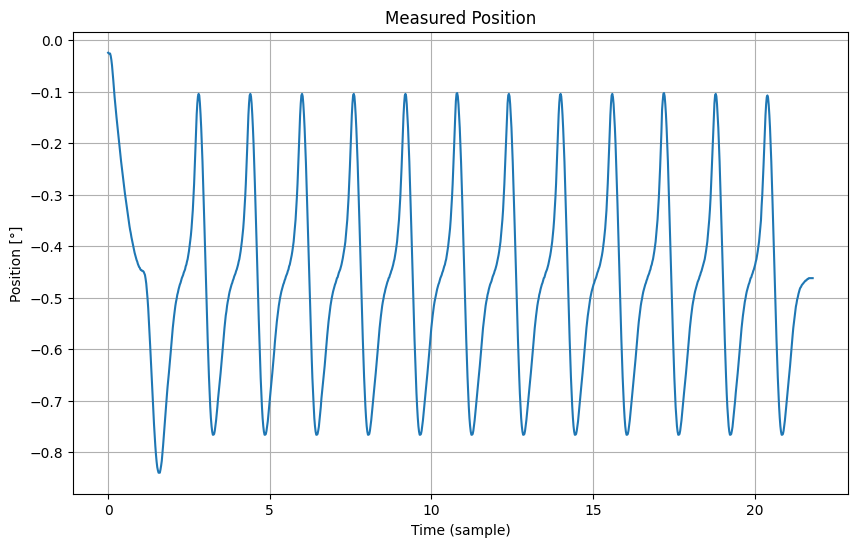

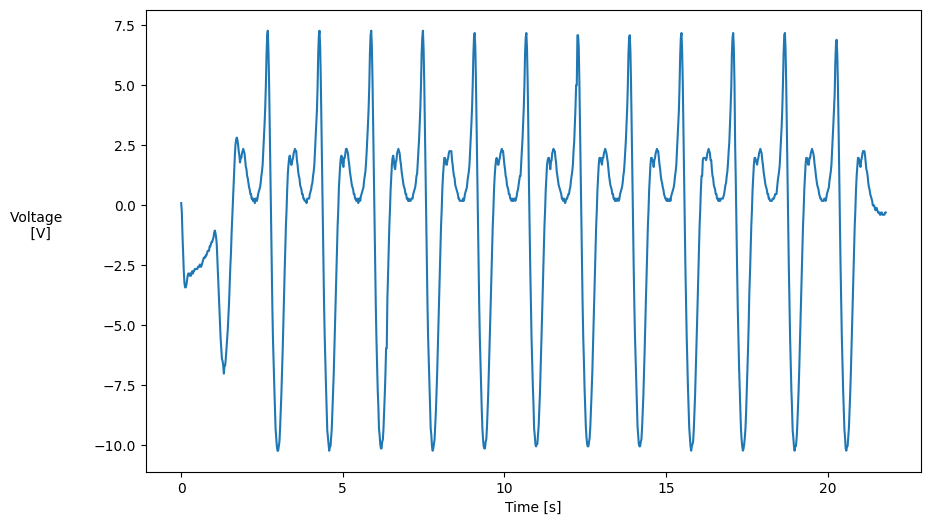

In [8]:
import sys
sys.path.append('../..')
from src.data_processing import process_file
from src.plotting import (
    plot_measured_I, 
    plot_measured_q, 
    plot_measured_q_dot,
    plot_measured_U
)
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Select the measurements
file_path = "/Users/simondeligne/Dionysos/thesis_model_dxl/data/used_reference_trajectories/Xing_trajectories/measures_interpolated/fast.txt"
# file_path = "/Users/simondeligne/Dionysos/thesis_model_dxl/data/used_reference_trajectories/Xing_trajectories/measures_interpolated/slow.txt"

df = process_file(file_path, delta_t=0.02)
df = df[:-9]
df['DXL_Position'] = df['DXL_Position'] - np.pi/2
df['DXL_Position'] = (df['DXL_Position'] * 180/np.pi - 1.5) * np.pi/180

plot_measured_q(df)
plot_measured_U(df)

df = df.rename(columns={'t':'time', 'DXL_Position':'θ(t)'})
dfs = df

# csv_filename = f'data/validation_exp/chirp_processed/{file_name}.csv'
# df.to_csv(csv_filename, index=False)

#### And now we apply this measured voltage into the system back

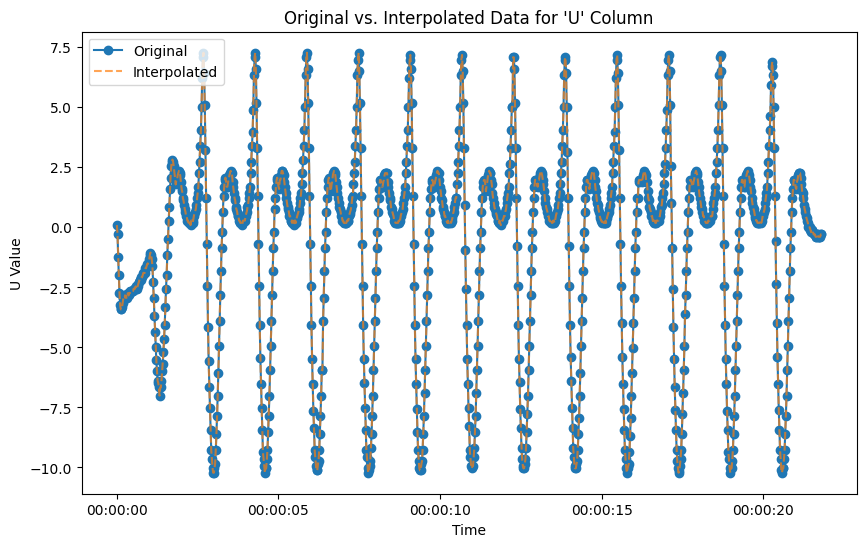

        time         U
0      0.000  0.094129
1      0.005 -0.003362
2      0.010 -0.100853
3      0.015 -0.198343
4      0.020 -0.295834
...      ...       ...
4356  21.780 -0.295834
4357  21.785 -0.295834
4358  21.790 -0.295834
4359  21.795 -0.295834
4360  21.800 -0.295834

[4361 rows x 2 columns]
Interpolated data saved to Xing_trajectories/walkingPattern_pwm_ref_fast.csv


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame and it includes 'time' and 'U' columns
df['time'] = pd.to_timedelta(df['time'], unit='s')
df.set_index(pd.to_datetime('2000-01-01') + df['time'], inplace=True)
df.drop(columns=["DXL_PWM", "DXL_Current", "DXL_Velocity", "θ(t)", "DXL_Input_Voltage"], inplace=True)  # The original 'time' column is now the index and will be dropped

# Plot original data
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['U'], label='Original', marker='o')

# Resample and interpolate
upsampled = df.resample('5L').asfreq()  # 'L' denotes milliseconds
interpolated = upsampled.interpolate(method='linear')

# Plot interpolated data
plt.plot(interpolated.index, interpolated['U'], label='Interpolated', alpha=0.7, linestyle='--')
plt.legend()
plt.xlabel('Time')
plt.ylabel('U Value')
plt.title('Original vs. Interpolated Data for \'U\' Column')
plt.show()

# Prepare the interpolated DataFrame for saving
interpolated['time'] = (interpolated.index - pd.to_datetime('2000-01-01')).total_seconds()
interpolated = interpolated.reset_index(drop=True)
interpolated = interpolated[['time'] + [col for col in interpolated.columns if col != 'time']]  # Reorder columns
print(interpolated)

units = 100/(0.113 * 12)

# Duplicate the 'U' column to fill the desired 4 columns, creating a total of 5 columns with 'time' as the first
final_df = pd.DataFrame({
    'Column1': interpolated['time'],
    'Column2': interpolated['U'] * units,
    'Column3': interpolated['U'] * units,
    'Column4': interpolated['U'] * units,
    'Column5': interpolated['U'] * units
})

# Define your output file path
output_file_path = 'Xing_trajectories/walkingPattern_pwm_ref_fast.csv'
# output_file_path = 'Xing_trajectories/walkingPattern_pwm_ref_slow.csv'

# Save to a new CSV file with the specified format
with open(output_file_path, 'w') as f:
    f.write('Column1,Column2,Column3,Column4,Column5\n')
final_df.to_csv(output_file_path, mode='a', index=False, header=False)

print(f"Interpolated data saved to {output_file_path}")

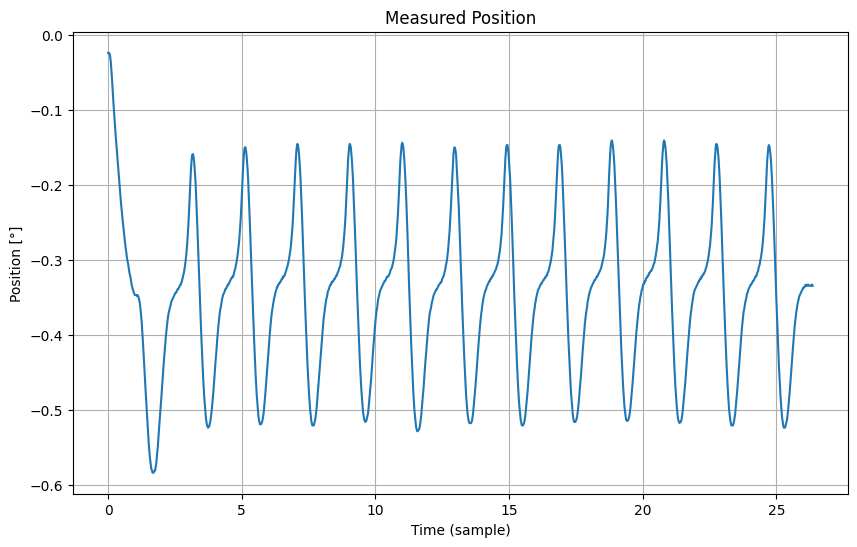

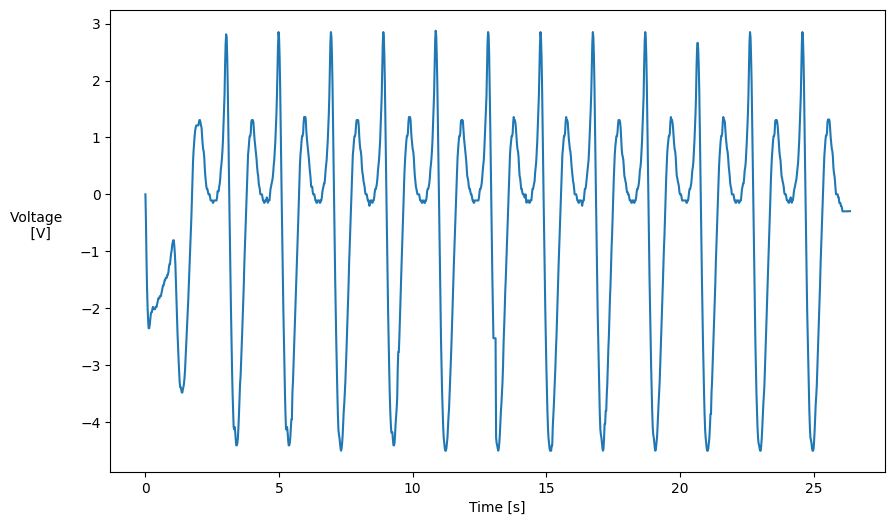

In [93]:
import sys
sys.path.append('../..')
from src.data_processing import process_file
from src.plotting import (
    plot_measured_I, 
    plot_measured_q, 
    plot_measured_q_dot,
    plot_measured_U
)
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Select the measurements
file_path = "/Users/simondeligne/Dionysos/thesis_model_dxl/data/used_reference_trajectories/Xing_trajectories/measures_interpolated/pwm_ctrl_fast.txt"
file_path = "/Users/simondeligne/Dionysos/thesis_model_dxl/data/used_reference_trajectories/Xing_trajectories/measures_interpolated/pwm_ctrl_slow.txt"

df = process_file(file_path, delta_t=0.02)
df = df[:-9]
df['DXL_Position'] = df['DXL_Position'] - np.pi/2
df['DXL_Position'] = (df['DXL_Position'] * 180/np.pi - 1.5) * np.pi/180

plot_measured_q(df)
plot_measured_U(df)

df = df.rename(columns={'t':'timestamp', 'DXL_Position':'θ(t)'})

csv_filename = f'/Users/simondeligne/Dionysos/thesis_model_dxl/data/used_reference_trajectories/Xing_trajectories/measures_interpolated/pwm_ctrl_fast.csv'
csv_filename = f'/Users/simondeligne/Dionysos/thesis_model_dxl/data/used_reference_trajectories/Xing_trajectories/measures_interpolated/pwm_ctrl_slow.csv'

df.to_csv(csv_filename, index=False)

### Double-pendulum reference input building

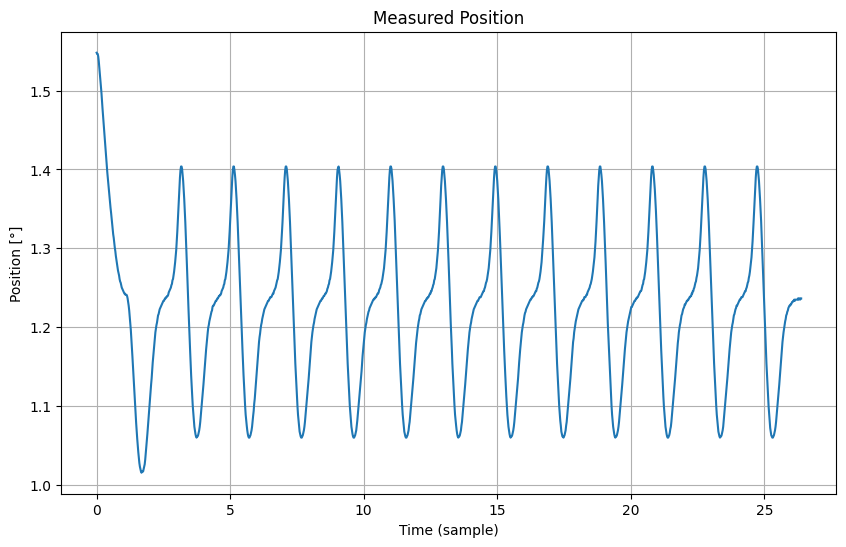

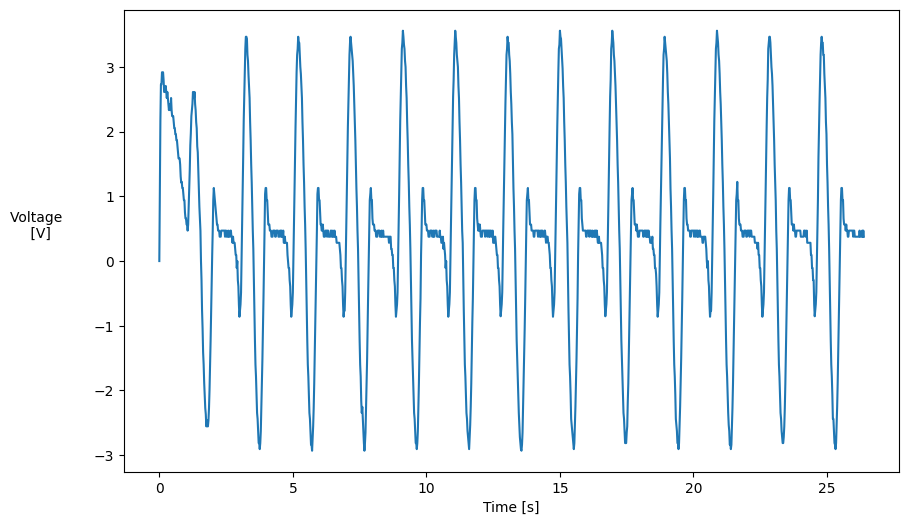

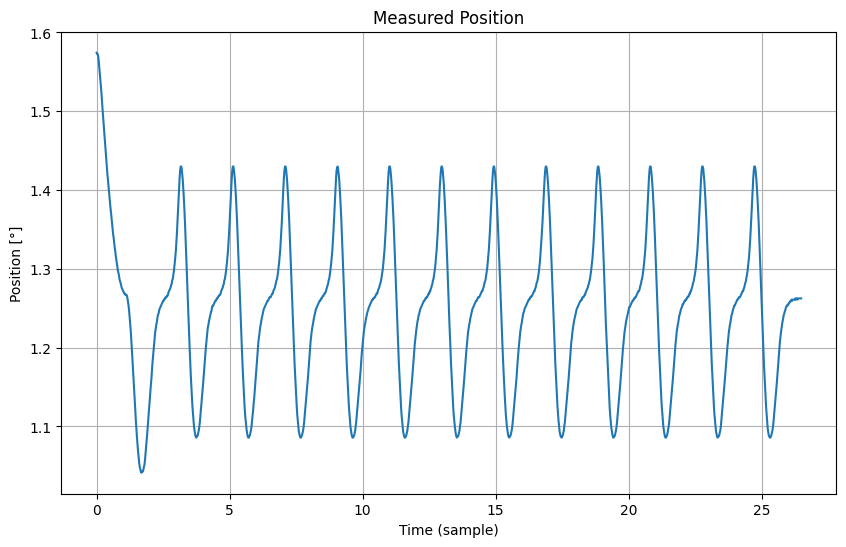

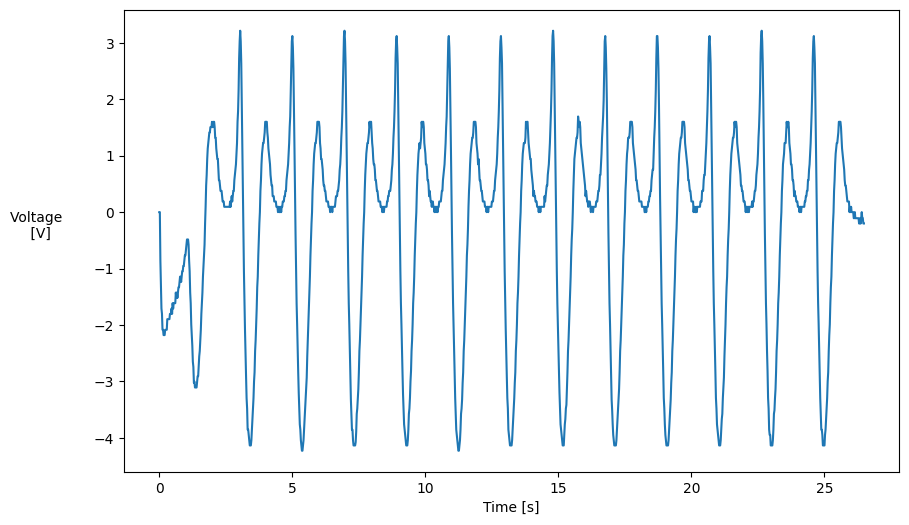

In [33]:
import sys
sys.path.append('../..')
from src.data_processing import process_file
from src.plotting import (
    plot_measured_I, 
    plot_measured_q, 
    plot_measured_q_dot,
    plot_measured_U
)
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Select the measurements
file_path1 = "/Users/simondeligne/Dionysos/thesis_model_dxl/data/validation_exp/mesures/double_pendulum/slow_knee.txt"
file_path2 = "/Users/simondeligne/Dionysos/thesis_model_dxl/data/validation_exp/mesures/double_pendulum/slow_hip.txt"
# file_path1 = "/Users/simondeligne/Dionysos/thesis_model_dxl/data/validation_exp/mesures/double_pendulum/fast_knee.txt"
# file_path2 = "/Users/simondeligne/Dionysos/thesis_model_dxl/data/validation_exp/mesures/double_pendulum/fast_hip.txt"

def _process(file_path, delta_t=0.02):
    df = process_file(file_path, delta_t=0.02)
    df = df[:-8]
    df1['DXL_Position'] = df['DXL_Position'] - np.pi/2
    df1['DXL_Position'] = (df['DXL_Position'] * 180/np.pi - 1.5) * np.pi/180
    # df = df.rename(columns={'t':'time', 'DXL_Position':'θ(t)'})

    return df

df1 = _process(file_path1, delta_t=0.02)
df2 = _process(file_path2, delta_t=0.02)

plot_measured_q(df1)
plot_measured_U(df1)

plot_measured_q(df2)
plot_measured_U(df2)

df1 = df1.rename(columns={'t':'time', 'DXL_Position':'θ(t)'})
df2 = df2.rename(columns={'t':'time', 'DXL_Position':'θ(t)'})

# csv_filename = f'data/validation_exp/chirp_processed/{file_name}.csv'
# df.to_csv(csv_filename, index=False)

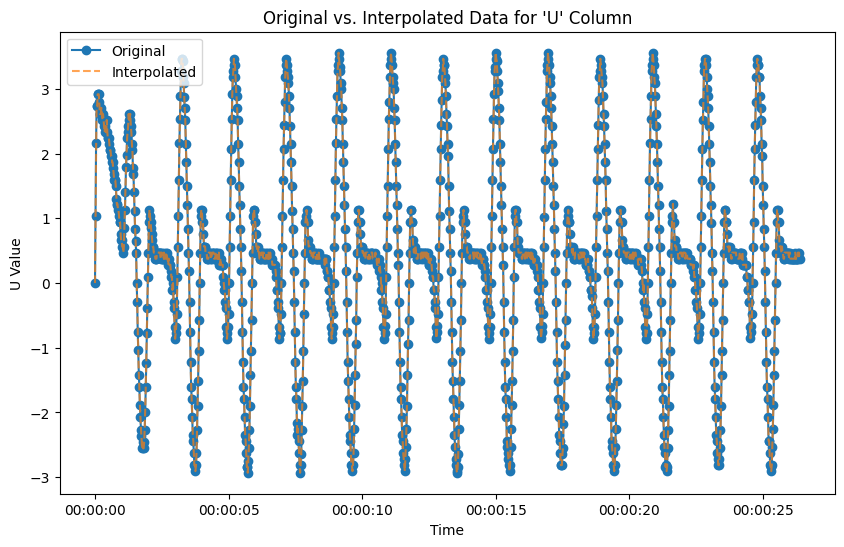

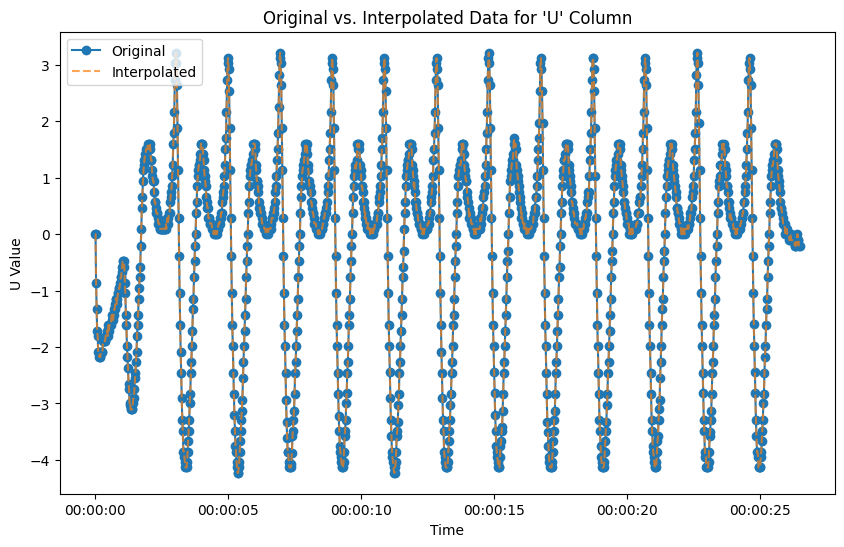

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## For hip
# Assuming 'df' is your DataFrame and it includes 'time' and 'U' columns
df1['time'] = pd.to_timedelta(df1['time'], unit='s')
df1.set_index(pd.to_datetime('2000-01-01') + df1['time'], inplace=True)
df1.drop(columns=["DXL_PWM", "DXL_Current", "DXL_Velocity", "θ(t)", "DXL_Input_Voltage"], inplace=True)  # The original 'time' column is now the index and will be dropped

# Plot original data
plt.figure(figsize=(10, 6))
plt.plot(df1.index, df1['U'], label='Original', marker='o')

# Resample and interpolate
upsampled = df1.resample('5L').asfreq()  # 'L' denotes milliseconds
interpolated1 = upsampled.interpolate(method='linear')

# Plot interpolated data
plt.plot(interpolated1.index, interpolated1['U'], label='Interpolated', alpha=0.7, linestyle='--')
plt.legend()
plt.xlabel('Time')
plt.ylabel('U Value')
plt.title('Original vs. Interpolated Data for \'U\' Column')
plt.show()

# Prepare the interpolated DataFrame for saving
interpolated1['time'] = (interpolated1.index - pd.to_datetime('2000-01-01')).total_seconds()
interpolated1 = interpolated1.reset_index(drop=True)
interpolated1 = interpolated1[['time'] + [col for col in interpolated1.columns if col != 'time']]  # Reorder columns

## For knee
# Assuming 'df' is your DataFrame and it includes 'time' and 'U' columns
df2['time'] = pd.to_timedelta(df2['time'], unit='s')
df2.set_index(pd.to_datetime('2000-01-01') + df2['time'], inplace=True)
df2.drop(columns=["DXL_PWM", "DXL_Current", "DXL_Velocity", "θ(t)", "DXL_Input_Voltage"], inplace=True)  # The original 'time' column is now the index and will be dropped

# Plot original data
plt.figure(figsize=(10, 6))
plt.plot(df2.index, df2['U'], label='Original', marker='o')

# Resample and interpolate
upsampled = df2.resample('5L').asfreq()  # 'L' denotes milliseconds
interpolated2 = upsampled.interpolate(method='linear')

# Plot interpolated data
plt.plot(interpolated2.index, interpolated2['U'], label='Interpolated', alpha=0.7, linestyle='--')
plt.legend()
plt.xlabel('Time')
plt.ylabel('U Value')
plt.title('Original vs. Interpolated Data for \'U\' Column')
plt.show()

# Prepare the interpolated DataFrame for saving
interpolated2['time'] = (interpolated2.index - pd.to_datetime('2000-01-01')).total_seconds()
interpolated2 = interpolated2.reset_index(drop=True)
interpolated2 = interpolated2[['time'] + [col for col in interpolated2.columns if col != 'time']]  # Reorder columns

units = 100/(0.113 * 12)

# Duplicate the 'U' column to fill the desired 4 columns, creating a total of 5 columns with 'time' as the first
final_df = pd.DataFrame({
    'Column1': interpolated1['time'],
    'Column2': interpolated1['U'] * units,
    'Column3': interpolated2['U'] * units,
    'Column4': interpolated1['U'] * units,
    'Column5': interpolated2['U'] * units
})


In [35]:
# Define your output file path
output_file_path = 'Xing_trajectories/double_pendulum/pwm_ref_fast.csv'
output_file_path = 'Xing_trajectories/double_pendulum/pwm_ref_slow.csv'

# Save to a new CSV file with the specified format
with open(output_file_path, 'w') as f:
    f.write('Column1,Column2,Column3,Column4,Column5\n')
final_df.to_csv(output_file_path, mode='a', index=False, header=False)

print(f"Interpolated data saved to {output_file_path}")

Interpolated data saved to Xing_trajectories/double_pendulum/pwm_ref_slow.csv
